ipynb.fs.full.Clustering_Std_KMEANS:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


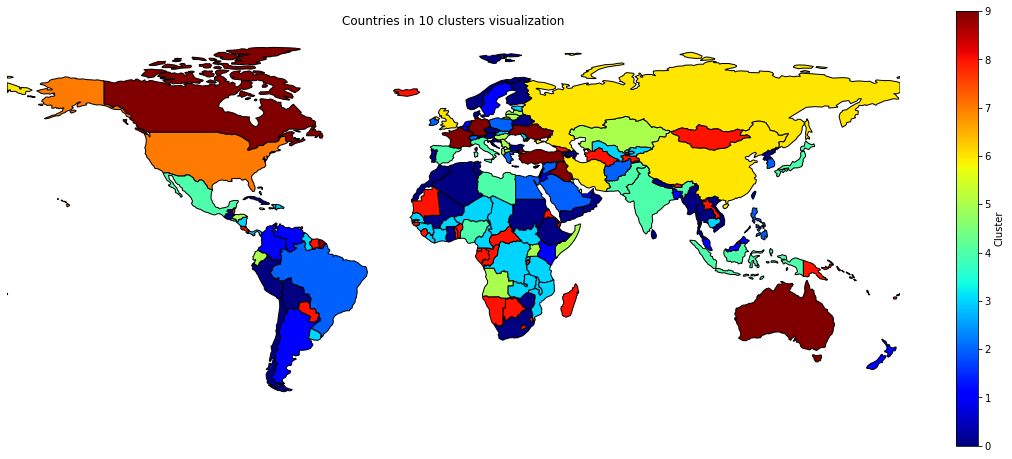

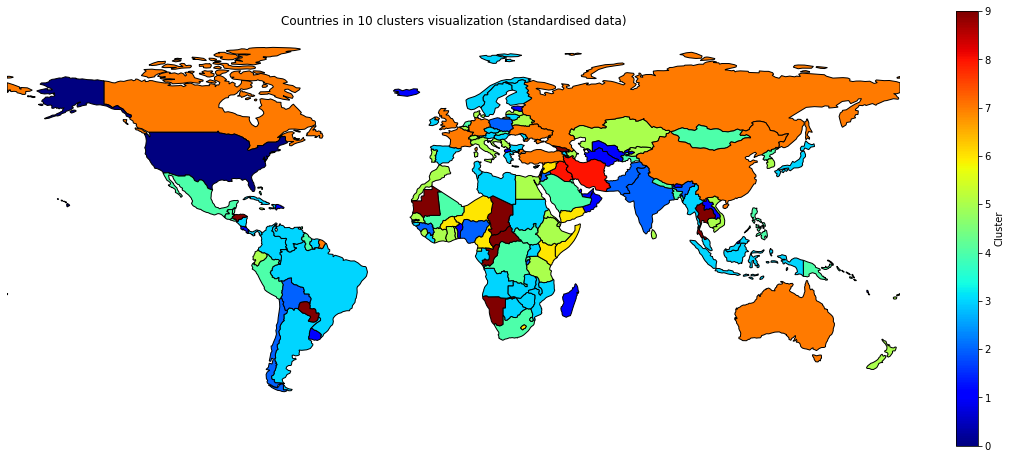

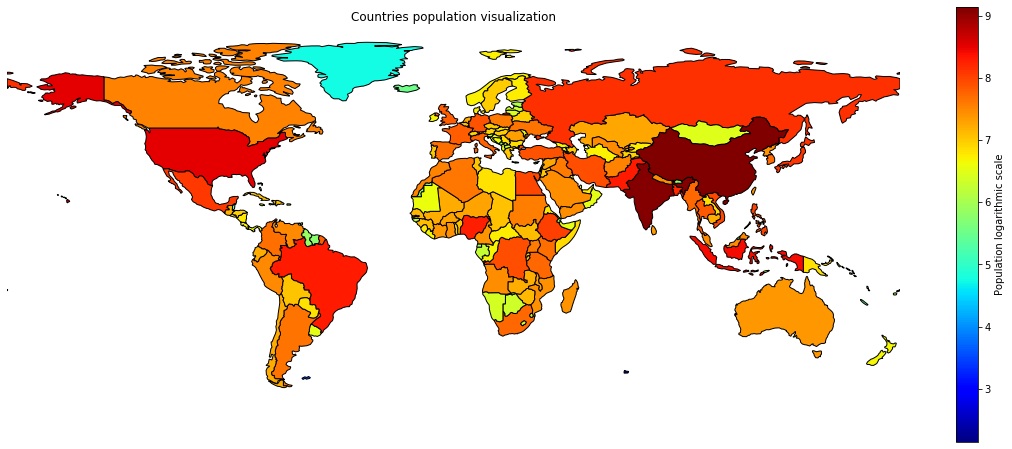

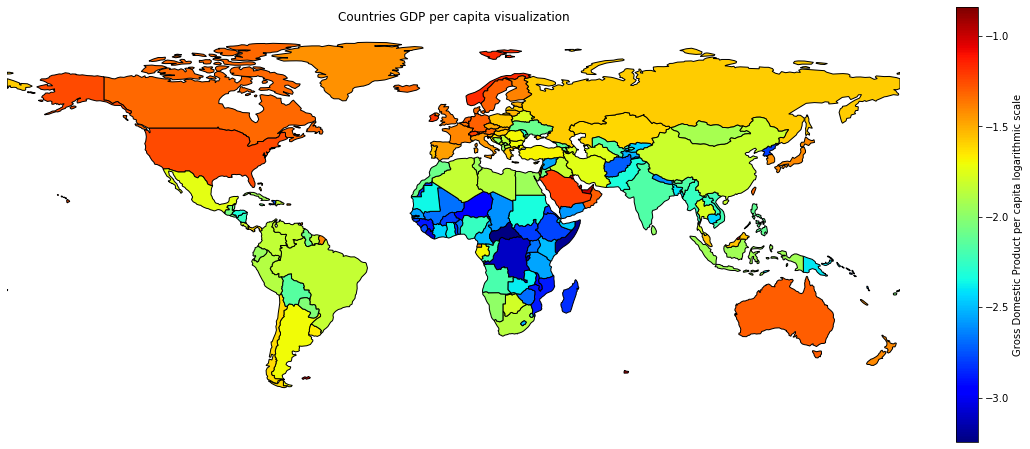

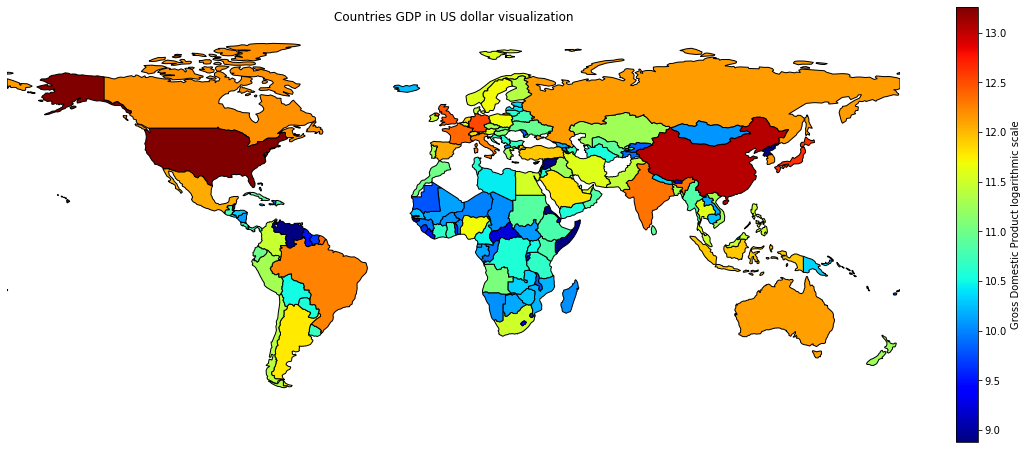

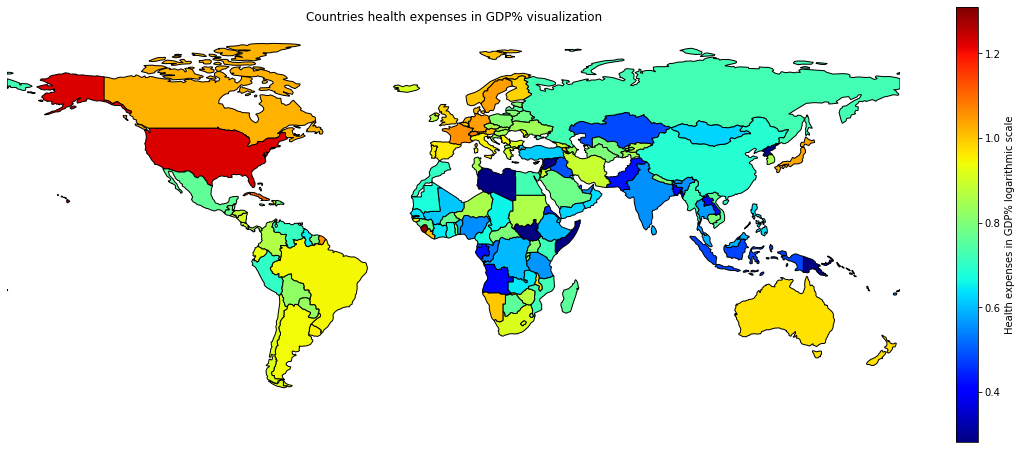

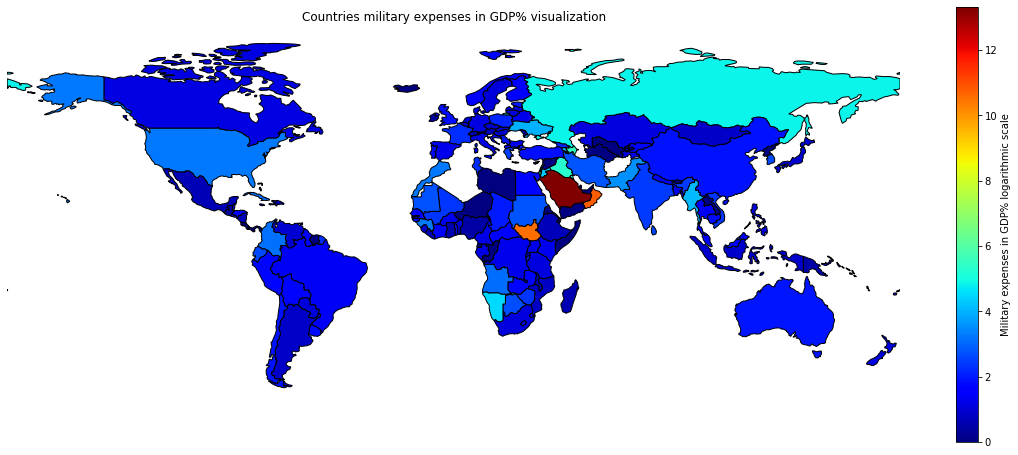

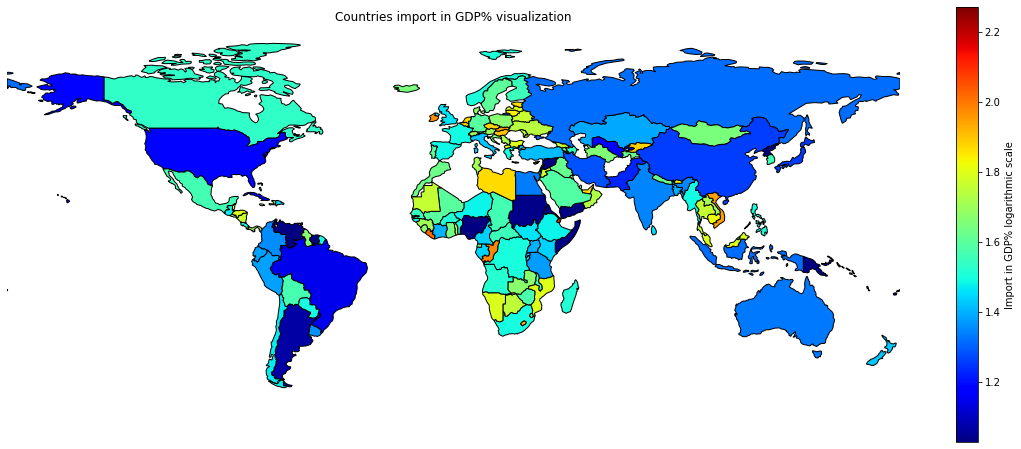

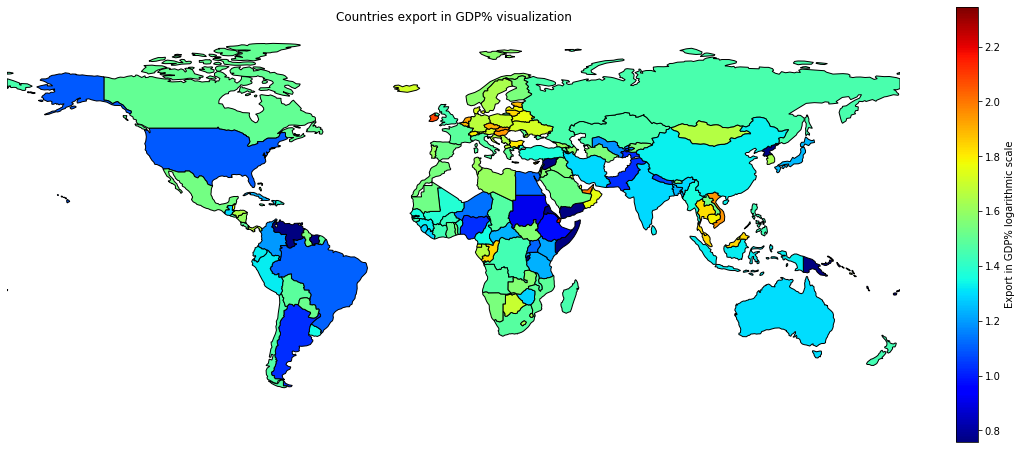

In [1]:
from ipynb.fs.full.Clusters_map import *

## Clusters on standardised data

In [2]:
import imgkit

def df_to_png(df, filename, path):
    imgkit.from_string(df.render(), '{}/{}.png'.format(path, filename),
                       options={
            'format': 'png',
            'quality' : '100',
            'width' : '1000',
                       })

def change_font_size(data, size=15):
    return 'font-size: {}pt'.format(size)


def color(data, reference):
    if data.dtype == float:
        reference_log=np.log10(reference[data.name])
        q1 = reference_log.quantile(.20)
        q2 = reference_log.quantile(.40)
        q3 = reference_log.quantile(.60)
        q4 = reference_log.quantile(.80)
        v = []
        for n in data:
            x = np.log10(n)
            if x < q1:
                form = 'red'
            elif x < q2:
                form = 'orange'
            elif x < q3:
                form = 'yellow'
            elif x < q4:
                form = 'lightgreen'
            elif x >= q4:
                form = 'green'
            else:
                form = ''
            formatting = 'background-color: {}'.format(form)
            v.append(formatting)
        return v
    else: #for different than float
        return pd.Series(np.where(data.index, '',''), data.index)

merged_std['gdp_per_cap'] = merged_std.gdp_md_est / merged_std.pop_est
merged_std[['GDP']] = np.log10(merged_std[['GDP']])


pd.options.display.float_format = '{:0.2g}'.format


for c in range(10):
    # print('cluster {}'.format(c), flush=True)
    display('cluster {}'.format(c))
    cluster = merged_std[merged_std.cluster==c]
    ilosc = cluster['iso_a3'].count()
    display("ilość krajów w klastrze: {}".format(ilosc))

    cluster_tab = cluster[['name',
                           'GDP', 'health' , 'military', 'education', 'imp', 'exp'
                           ]].sort_values(by='name')


    cluster_tab = cluster_tab\
        .style\
        .hide_index()\
        .apply(color, reference=merged_std.copy())\
        .applymap(change_font_size)\
        .format("{:.2}", na_rep="-").format({'name':"{:}"})

    df_to_png(cluster_tab, "cluster{}stdkmeans".format(c), 'text/tables/CLUST')
    display(cluster_tab)

    data= {'mean':[], 'median':[], 'std':[], 'min':[], 'max':[]}
    cluster_desc = pd.DataFrame(data)

    for param in {'pop_est',
                  'gdp_per_cap',
                  'Events',
                  'sumNumMentions',
                  'materialConfCoop',
                  'verbalConfCoop',
                  'avgAvgTone',
                  'avgGoldstein',
                  'fightCount',
                  'expressCount',
                  'GDP',
                  'health' ,
                  'military',
                  'education',
                  'imp',
                  'exp'
                  }:
        row = {
           'mean':cluster[param].mean(),
           'median':cluster[param].median(),
           'std':cluster[param].std(),
           'min':cluster[param].min(),
           'max':cluster[param].max(),
           }

        cluster_desc = cluster_desc.append(pd.Series(row).rename(param))

    display(cluster_desc)
    cluster_desc.to_latex('text/tables/CLUST/desc/clust{}std_desc.tex'.format(c),
                          na_rep='-',
                          caption='Parametry klastra {} - dane standaryzowane'.format(c),
                          label='tab:cl{}std_desc'.format(c),
                          bold_rows=True
                          )

'cluster 0'

'ilość krajów w klastrze: 1'

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/pandas/core/series.py:6

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                    

name,GDP,health,military,education,imp,exp
United States of America,1.3e+01,1.7e+01,3.3,-,1.5e+01,1.2e+01


,mean,median,std,min,max
pop_est,3.3e+08,3.3e+08,nan,3.3e+08,3.3e+08
avgGoldstein,0.37,0.37,nan,0.37,0.37
verbalConfCoop,0.13,0.13,nan,0.13,0.13
GDP,13,13,nan,13,13
avgAvgTone,-2.3,-2.3,nan,-2.3,-2.3
exp,12,12,nan,12,12
health,17,17,nan,17,17
imp,15,15,nan,15,15
military,3.3,3.3,nan,3.3,3.3
education,nan,nan,nan,nan,nan


'cluster 1'

'ilość krajów w klastrze: 18'

name,GDP,health,military,education,imp,exp
Benin,1e+01,4.0,1.1,4.4,3.2e+01,2.5e+01
Bhutan,9.3,3.7,-,7.3,6.8e+01,3.4e+01
Brunei,1e+01,2.4,3.3,-,3.8e+01,5.2e+01
Costa Rica,1.1e+01,7.8,0.0,7.1,3.2e+01,3.1e+01
Dominican Rep.,1.1e+01,6.0,0.67,-,2.8e+01,2.4e+01
Estonia,1e+01,6.4,2.0,5.1,7.3e+01,7.7e+01
Iceland,1e+01,8.2,-,7.5,4.5e+01,5.2e+01
Laos,1e+01,2.5,-,-,5.2e+01,3.4e+01
Luxembourg,1.1e+01,5.5,0.48,4.0,1.9e+02,2.2e+02
Macedonia,1e+01,6.3,0.99,-,6.5e+01,4.9e+01


,mean,median,std,min,max
pop_est,6.4e+06,3.4e+06,8.4e+06,2.8e+05,3e+07
avgGoldstein,1.9,1.9,0.33,1.5,2.7
verbalConfCoop,0.082,0.079,0.022,0.048,0.13
GDP,10,10,0.65,8.9,12
avgAvgTone,-0.25,-0.29,0.38,-0.92,0.4
exp,54,36,48,15,2.2e+02
health,5.3,5.6,1.9,2.4,9
imp,53,45,39,15,1.9e+02
military,2.2,1,3.2,0,11
education,5.5,5.5,1.7,2.6,7.5


'cluster 2'

'ilość krajów w klastrze: 12'

name,GDP,health,military,education,imp,exp
Bolivia,1.1e+01,6.6,1.7,-,3.7e+01,3.1e+01
Burundi,9.5,6.6,2.2,6.4,2.7e+01,5.7
Chile,1.1e+01,8.3,1.9,4.9,3e+01,2.9e+01
Gambia,9.1,3.1,1.5,2.1,3.3e+01,1.6e+01
Guinea,9.9,5.8,3.3,2.5,5.1e+01,2.1e+01
India,1.2e+01,3.6,2.4,-,2.2e+01,2e+01
Jordan,1.1e+01,7.6,4.3,-,6e+01,3.7e+01
Lebanon,1.1e+01,7.7,4.5,-,4.9e+01,2.3e+01
Nigeria,1.2e+01,3.6,0.42,-,1.1e+01,1.1e+01
Pakistan,1.1e+01,2.7,3.6,2.7,1.7e+01,1.1e+01


,mean,median,std,min,max
pop_est,1.5e+08,1.2e+07,3.6e+08,2.1e+06,1.3e+09
avgGoldstein,0.23,0.33,0.42,-0.46,0.75
verbalConfCoop,0.18,0.17,0.025,0.15,0.23
GDP,11,11,0.97,9.1,12
avgAvgTone,-2.4,-2.3,0.61,-4.1,-1.7
exp,23,21,12,5.7,49
health,5.6,6.4,2,2.7,8.3
imp,37,35,16,11,60
military,2.5,2.2,1.2,0.42,4.5
education,4.1,4.8,1.6,2.1,6.4


'cluster 3'

'ilość krajów w klastrze: 43'

name,GDP,health,military,education,imp,exp
Angola,1.1e+01,2.6,3.1,-,3.3e+01,3e+01
Argentina,1.2e+01,8.8,0.85,5.8,1.2e+01,1.1e+01
Armenia,1e+01,1e+01,4.2,2.8,4.2e+01,3e+01
Austria,1.2e+01,1e+01,0.7,5.5,4.9e+01,5.3e+01
Botswana,1e+01,5.7,2.7,-,5.6e+01,5e+01
Brazil,1.2e+01,8.9,1.4,6.2,1.4e+01,1.3e+01
Bulgaria,1.1e+01,8.2,1.3,-,6.3e+01,6.4e+01
Colombia,1.1e+01,7.3,3.1,4.5,2.3e+01,1.6e+01
Cuba,1.1e+01,1.3e+01,3.1,-,1.4e+01,1.7e+01
Cyprus,1e+01,6.8,1.7,6.4,6.8e+01,7e+01


,mean,median,std,min,max
pop_est,2.7e+07,1e+07,5.2e+07,2.7e+05,2.6e+08
avgGoldstein,0.97,0.97,0.25,0.49,1.4
verbalConfCoop,0.13,0.13,0.016,0.1,0.19
GDP,11,11,0.8,9,13
avgAvgTone,-1.6,-1.7,0.5,-2.5,-0.23
exp,41,35,25,8.2,1.2e+02
health,7.5,7.3,2.3,2.6,13
imp,47,47,23,11,1.1e+02
military,1.5,1.3,1,0,4.2
education,5.2,5.5,1.4,2.8,7.6


'cluster 4'

'ilość krajów w klastrze: 26'

name,GDP,health,military,education,imp,exp
Bahamas,1e+01,5.7,-,-,3.8e+01,3.5e+01
Bangladesh,1.1e+01,2.5,1.4,-,2.5e+01,1.7e+01
Belize,9.2,5.9,1.1,6.8,6.6e+01,5.9e+01
Dem. Rep. Congo,1.1e+01,3.9,1.3,2.2,3.2e+01,2.8e+01
El Salvador,1e+01,7.6,1.1,3.9,4.7e+01,2.9e+01
Guatemala,1.1e+01,6.0,0.4,3.0,3e+01,2e+01
Guyana,9.5,4.5,1.5,5.2,4.7e+01,3.6e+01
Kuwait,1.1e+01,4.0,5.0,-,4.5e+01,5.4e+01
Mali,1e+01,4.1,2.4,3.8,4e+01,2.4e+01
Mexico,1.2e+01,5.8,0.66,5.2,3.7e+01,3.5e+01


,mean,median,std,min,max
pop_est,2.9e+07,1.2e+07,4.2e+07,3.3e+05,1.6e+08
avgGoldstein,0.58,0.56,0.27,-0.014,1.1
verbalConfCoop,0.1,0.11,0.021,0.043,0.13
GDP,11,10,0.84,9.1,12
avgAvgTone,-2.1,-2,0.65,-3.7,-1.1
exp,36,33,20,10,92
health,5.6,5.9,1.8,1.9,10
imp,42,40,16,24,89
military,2.3,1.2,3.2,0.4,13
education,4.3,4.1,1.4,1.5,6.8


'cluster 5'

'ilość krajów w klastrze: 32'

name,GDP,health,military,education,imp,exp
Azerbaijan,1.1e+01,6.7,5.5,3.0,3.5e+01,3.8e+01
Belarus,1.1e+01,6.1,1.3,4.8,5.8e+01,5.8e+01
Belgium,1.2e+01,1e+01,0.92,6.5,7.6e+01,7.8e+01
Cambodia,1e+01,6.2,1.8,-,6.6e+01,6.2e+01
Croatia,1.1e+01,6.8,1.5,-,4.6e+01,4.6e+01
Côte d'Ivoire,1.1e+01,4.4,1.7,4.8,2.5e+01,2.7e+01
Denmark,1.1e+01,1e+01,1.1,-,4.9e+01,5.5e+01
Djibouti,9.4,4.4,-,5.3,1.2e+02,1.4e+02
Ecuador,1.1e+01,8.6,2.6,5.0,2.4e+01,2.1e+01
Egypt,1.2e+01,5.3,1.7,-,2.2e+01,1.3e+01


,mean,median,std,min,max
pop_est,2.3e+07,1e+07,2.9e+07,7.8e+05,1.1e+08
avgGoldstein,1.4,1.4,0.25,0.97,2.1
verbalConfCoop,0.099,0.1,0.015,0.065,0.12
GDP,11,11,0.74,9.4,12
avgAvgTone,-0.95,-0.99,0.4,-1.7,-0.27
exp,43,36,27,9.4,1.4e+02
health,6.7,5.9,3.5,2.9,20
imp,47,43,22,22,1.2e+02
military,1.7,1.5,0.99,0.53,5.5
education,4.8,4.9,1.1,2.2,6.5


'cluster 6'

'ilość krajów w klastrze: 8'

name,GDP,health,military,education,imp,exp
Burkina Faso,1e+01,5.8,1.3,4.2,3.3e+01,2.6e+01
Cameroon,1e+01,4.7,1.2,2.8,2.8e+01,2.2e+01
Kenya,1.1e+01,5.2,1.3,5.3,2.8e+01,1.7e+01
Lesotho,9.4,8.4,1.8,-,8.6e+01,4.3e+01
Niger,1e+01,7.1,-,6.0,3.1e+01,1.4e+01
Somalia,-,-,-,-,-,-
Syria,-,-,-,-,-,-
Yemen,1.1e+01,4.2,-,-,-,-


,mean,median,std,min,max
pop_est,2.1e+07,2e+07,1.4e+07,2e+06,4.8e+07
avgGoldstein,-0.85,-0.66,0.5,-1.7,-0.28
verbalConfCoop,0.11,0.11,0.022,0.081,0.14
GDP,10,10,0.52,9.4,11
avgAvgTone,-3.8,-4,0.62,-4.5,-2.8
exp,24,22,11,14,43
health,5.9,5.5,1.6,4.2,8.4
imp,41,31,25,28,86
military,1.4,1.3,0.28,1.2,1.8
education,4.6,4.7,1.4,2.8,6


'cluster 7'

'ilość krajów w klastrze: 10'

name,GDP,health,military,education,imp,exp
Australia,1.2e+01,9.3,2.0,5.3,2.2e+01,2e+01
Canada,1.2e+01,1.1e+01,1.2,-,3.4e+01,3.2e+01
China,1.3e+01,4.9,1.9,-,1.8e+01,2.1e+01
France,1.2e+01,1.1e+01,2.3,-,3.1e+01,3.1e+01
Germany,1.3e+01,1.1e+01,1.2,4.8,3.9e+01,4.7e+01
Israel,1.1e+01,7.1,5.6,5.9,2.8e+01,3.1e+01
Russia,1.2e+01,5.3,4.9,3.8,2.1e+01,2.9e+01
Turkey,1.2e+01,4.1,1.8,-,2.6e+01,2.3e+01
Ukraine,1.1e+01,6.9,4.0,-,5.5e+01,5.3e+01
United Kingdom,1.2e+01,9.7,1.9,5.6,2.9e+01,2.8e+01


,mean,median,std,min,max
pop_est,1.9e+08,6.6e+07,4.2e+08,8.3e+06,1.4e+09
avgGoldstein,0.84,0.96,0.45,0.011,1.4
verbalConfCoop,0.12,0.12,0.015,0.1,0.14
GDP,12,12,0.58,11,13
avgAvgTone,-2.2,-2.2,0.47,-3.2,-1.4
exp,31,30,11,20,53
health,8,8.2,2.7,4.1,11
imp,30,29,11,18,55
military,2.7,1.9,1.6,1.2,5.6
education,5.1,5.3,0.8,3.8,5.9


'cluster 8'

'ilość krajów w klastrze: 2'

name,GDP,health,military,education,imp,exp
Iran,1.2e+01,7.8,2.8,2.8,1.9e+01,2e+01
Iraq,1.1e+01,3.1,5.3,-,4.1e+01,3.5e+01


,mean,median,std,min,max
pop_est,6.1e+07,6.1e+07,3e+07,3.9e+07,8.2e+07
avgGoldstein,-1.8,-1.8,0.063,-1.9,-1.8
verbalConfCoop,0.18,0.18,0.02,0.17,0.2
GDP,11,11,0.24,11,12
avgAvgTone,-4.5,-4.5,0.02,-4.5,-4.5
exp,28,28,11,20,35
health,5.5,5.5,3.3,3.1,7.8
imp,30,30,16,19,41
military,4.1,4.1,1.8,2.8,5.3
education,2.8,2.8,nan,2.8,2.8


'cluster 9'

'ilość krajów w klastrze: 9'

name,GDP,health,military,education,imp,exp
Central African Rep.,9.2,6.3,1.7,-,3.6e+01,1.7e+01
Chad,1e+01,4.5,2.0,-,3.7e+01,3e+01
Congo,9.9,3.4,-,4.6,9.6e+01,6.9e+01
Georgia,1e+01,7.9,2.1,-,5.8e+01,4.1e+01
Honduras,1e+01,7.7,1.7,6.4,6.2e+01,4.5e+01
Mauritania,9.8,4.7,2.8,-,5.7e+01,3.4e+01
Namibia,1e+01,9.9,4.5,-,6.2e+01,3.6e+01
Paraguay,1.1e+01,6.7,1.1,-,3.2e+01,3.3e+01
Thailand,1.2e+01,3.7,1.4,-,5.7e+01,6.8e+01


,mean,median,std,min,max
pop_est,1.3e+07,5.6e+06,2.1e+07,2.5e+06,6.8e+07
avgGoldstein,1,1.1,0.4,0.45,1.7
verbalConfCoop,0.07,0.079,0.027,0,0.09
GDP,10,10,0.65,9.2,12
avgAvgTone,-2.9,-2.8,0.57,-3.9,-2
exp,41,36,17,17,69
health,6.1,6.3,2.2,3.4,9.9
imp,55,57,20,32,96
military,2.2,1.9,1.1,1.1,4.5
education,5.5,5.5,1.3,4.6,6.4
